In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from visuals import CLRS

In [6]:
def read_log(path):
    data = pd.read_csv(path+'/log.csv', skiprows=np.array([3,5,7,9,11,13,15,17,19,21,23])-1)
    return (np.array(data['return_mean']), np.array(data['frames']))

In [3]:
def collect_data(parent_dir):
    dirs = os.listdir(parent_dir)
    means = []
    size = math.inf
    for directory in dirs:
        mean, fr = read_log(parent_dir + '/' + directory)
        if mean.size < size:
            size = mean.size
            frames = fr
        else:
            mean = mean[:size]
        means.append(mean)
    return (np.stack(means), frames)

def smooth(data, size=20):
    kernel_size = size
    kernel = np.ones(kernel_size) / kernel_size
    return np.convolve(data, kernel, mode='same')

In [19]:
def smooth_data(path, smoothing=True):
    data, frames = collect_data(path)
    mean = data.mean(axis=0)
    dmin = data.min(axis=0)
    dmax = data.max(axis=0)
    std = data.std(axis=0)
    if smoothing:
        mean = smooth(mean)[:-20]
        dmin = smooth(dmin)[:-20]
        dmax = smooth(dmax)[:-20]
        std = smooth(std)[:-20]
        frames = frames[:-20]
    return mean, dmin, dmax, std, frames

In [8]:
FO_data, FO_frames = collect_data("storage/FO-PO-PC-neg024/FO")
PO_data, PO_frames = collect_data("storage/FO-PO-PC-neg024/PO")
PC_data, PC_frames = collect_data("storage/FO-PO-PC-neg024/PC")

In [9]:
FO_mean = FO_data.mean(axis=0)
PC_mean = PC_data.mean(axis=0)
PO_mean = PO_data[[0,1,2,3,4,5,7,9]].mean(axis=0)

FO_min = FO_data.min(axis=0)
PC_min = PC_data.min(axis=0)
PO_min = PO_data[[0,1,2,3,4,5,7,9]].min(axis=0)

FO_max = FO_data.max(axis=0)
PC_max = PC_data.max(axis=0)
PO_max = PO_data[[0,1,2,3,4,5,7,9]].max(axis=0)

FO_std = FO_data.std(axis=0)
PC_std = PC_data.std(axis=0)
PO_std = PO_data[[0,1,2,3,4,5,7,9]].std(axis=0)

In [10]:
FO_mean = smooth(FO_data.mean(axis=0))[:-20]
PC_mean = smooth(PC_data.mean(axis=0))[:-20]
PO_mean = smooth(PO_data[[0,1,2,3,4,5,7,9]].mean(axis=0))[:-20]

FO_min = smooth(FO_data.min(axis=0))[:-20]
PC_min = smooth(PC_data.min(axis=0))[:-20]
PO_min = smooth(PO_data[[0,1,2,3,4,5,7,9]].min(axis=0))[:-20]
FO_max = smooth(FO_data.max(axis=0))[:-20]
PC_max = smooth(PC_data.max(axis=0))[:-20]
PO_max = smooth(PO_data[[0,1,2,3,4,5,7,9]].max(axis=0))[:-20]

FO_std = smooth(FO_data.std(axis=0))[:-20]
PC_std = smooth(PC_data.std(axis=0))[:-20]
PO_std = smooth(PO_data[[0,1,2,3,4,5,7,9]].std(axis=0))[:-20]

FO_frames = FO_frames[:-20]
PC_frames = PC_frames[:-20]
PO_frames = PO_frames[:-20]

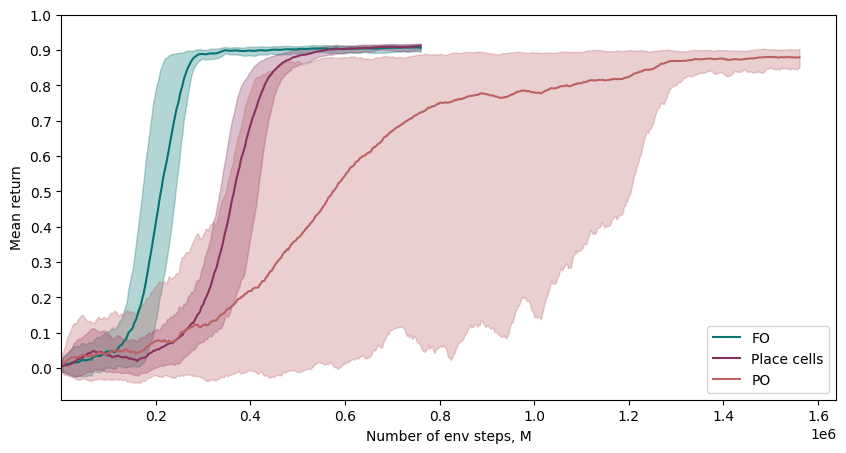

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(FO_frames, FO_mean, color=CLRS['cyan'])
ax.plot(PC_frames, PC_mean, color=CLRS['magenta'])
ax.plot(PO_frames, PO_mean, color=CLRS['coral'])
ax.fill_between(FO_frames, FO_min, FO_max, color=CLRS['cyan'], alpha=0.3)
ax.fill_between(PC_frames, PC_min, PC_max, color=CLRS['magenta'], alpha=0.3)
ax.fill_between(PO_frames, PO_min, PO_max, color=CLRS['coral'], alpha=0.3)
# ax.fill_between(FO_frames, FO_mean-FO_std, FO_mean+FO_std, color=CLRS['cyan'], alpha=0.3)
# ax.fill_between(PC_frames, PC_mean-PC_std, PC_mean+PC_std, color=CLRS['magenta'], alpha=0.3)
# ax.fill_between(PO_frames, PO_mean-PO_std, PO_mean+PO_std, color=CLRS['coral'], alpha=0.3)
plt.ylabel('Mean return')
plt.xlabel('Number of env steps, M')
plt.xlim(1)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(('FO', 'Place cells', 'PO'), loc=4)
plt.show()
fig.savefig('storage/figs/FO_PO_PC.png', transparent=True)

In [36]:
data_1, frames_1 = collect_data("storage/SD comparison/1")
data_2, frames_2 = collect_data("storage/SD comparison/2")
data_3, frames_3 = collect_data("storage/SD comparison/3")
data_4, frames_4 = collect_data("storage/SD comparison/4")
data_5, frames_5 = collect_data("storage/SD comparison/5")
data_6, frames_6 = collect_data("storage/SD comparison/6")
data_7, frames_7 = collect_data("storage/SD comparison/7")
data_8, frames_8 = collect_data("storage/SD comparison/8")

In [37]:
mean_1 = data_1.mean(axis=0)
mean_2 = data_2.mean(axis=0)
mean_3 = data_3.mean(axis=0)
mean_4 = data_4.mean(axis=0)
mean_5 = data_5.mean(axis=0)
mean_6 = data_6.mean(axis=0)
mean_7 = data_7.mean(axis=0)
mean_8 = data_8.mean(axis=0)

std_1 = data_1.std(axis=0)
std_2 = data_2.std(axis=0)
std_3 = data_3.std(axis=0)
std_4 = data_4.std(axis=0)
std_5 = data_5.std(axis=0)
std_6 = data_6.std(axis=0)
std_7 = data_7.std(axis=0)
std_8 = data_8.std(axis=0)

In [38]:
mean_1 = smooth(mean_1)[:-20]
mean_2 = smooth(mean_2)[:-20]
mean_3 = smooth(mean_3)[:-20]
mean_4 = smooth(mean_4)[:-20]
mean_5 = smooth(mean_5)[:-20]
mean_6 = smooth(mean_6)[:-20]
mean_7 = smooth(mean_7)[:-20]
mean_8 = smooth(mean_8)[:-20]

std_1 = smooth(std_1)[:-20]
std_2 = smooth(std_2)[:-20]
std_3 = smooth(std_3)[:-20]
std_4 = smooth(std_4)[:-20]
std_5 = smooth(std_5)[:-20]
std_6 = smooth(std_6)[:-20]
std_7 = smooth(std_7)[:-20]
std_8 = smooth(std_8)[:-20]

In [39]:
frames_1 = frames_1[:-20]
frames_2 = frames_2[:-20]
frames_3 = frames_3[:-20]
frames_4 = frames_4[:-20]
frames_5 = frames_5[:-20]
frames_6 = frames_6[:-20]
frames_7 = frames_7[:-20]
frames_8 = frames_8[:-20]

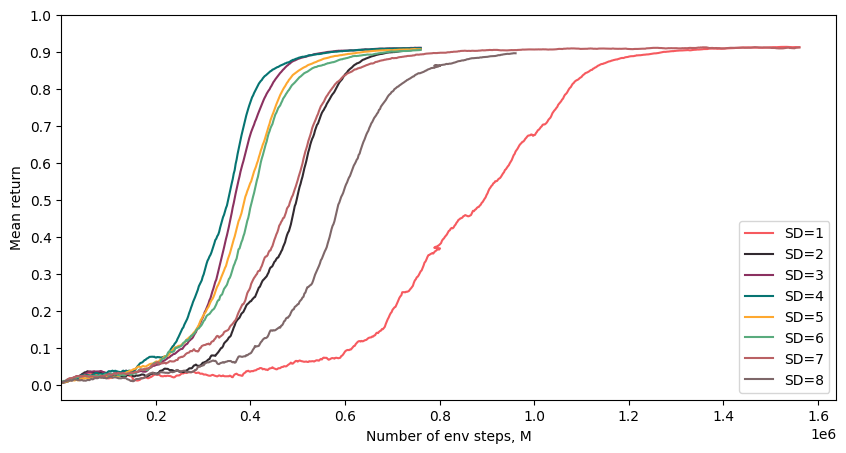

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(frames_1, mean_1, color=CLRS['salmon'])
ax.plot(frames_2, mean_2, color=CLRS['coal'])
ax.plot(frames_3, mean_3, color=CLRS['magenta'])
ax.plot(frames_4, mean_4, color=CLRS['cyan'])
ax.plot(frames_5, mean_5, color=CLRS['orange'])
ax.plot(frames_6, mean_6, color=CLRS['mint'])
ax.plot(frames_7, mean_7, color=CLRS['coral'])
ax.plot(frames_8, mean_8, color=CLRS['grey'])
# ax.fill_between(frames_1, mean_1-std_1, mean_1+std_1, color=CLRS['coral'], alpha=0.3)
# ax.fill_between(frames_2, mean_2-std_2, mean_2+std_2, color=CLRS['coal'], alpha=0.3)
# ax.fill_between(frames_3, mean_3-std_3, mean_3+std_3, color=CLRS['magenta'], alpha=0.3)
# ax.fill_between(frames_4, mean_4-std_4, mean_4+std_4, color=CLRS['cyan'], alpha=0.3)
# ax.fill_between(frames_5, mean_5-std_5, mean_5+std_5, color=CLRS['orange'], alpha=0.3)
# ax.fill_between(frames_6, mean_6-std_6, mean_6+std_6, color=CLRS['mint'], alpha=0.3)
# ax.set_facecolor(CLRS['beige'])
plt.ylabel('Mean return')
plt.xlabel('Number of env steps, M')
plt.xlim(1)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(('SD=1', 'SD=2', 'SD=3', 'SD=4', 'SD=5', 'SD=6', 'SD=7', 'SD=8'), loc=4)
plt.show()
fig.savefig('storage/figs/PC_SD.png', transparent=True)

In [41]:
import utils
import numpy as np

env = utils.make_env('MiniGrid-FakeLava-5x5-3x4-v0')
env.reset()

def si(cells, func):
    grid = np.zeros((cells,23*17))
    for i in range(23):
        for j in range(17):
            response = func.activation((i+1,j+1))
            grid[:,i*17+j] = response
    mean = grid.mean(axis=1)
    info =  np.multiply(grid, np.log2(np.divide(grid, mean[None].T)))
    return info.mean()

def mean_info(sd, cells, n):
    minfo = np.zeros(n)
    for i in range(n):
        fake_pc = utils.FakePlaceCells(env, cells, sd, i)
        minfo[i] = si(cells, fake_pc)
    return minfo.mean() 

/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-BlockedUnlockPickup-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N1-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N2-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay/lib/python3.7/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding

In [42]:
def arghalfmax(arr):
    halfmax = arr.max()/2
    return (arr>halfmax).argmax()

In [43]:
info = [
    mean_info(1, 100, 100),
    mean_info(2, 100, 100),
    mean_info(3, 100, 100),
    mean_info(4, 100, 100),
    mean_info(5, 100, 100),
    mean_info(6, 100, 100),
    mean_info(7, 100, 100),
    mean_info(8, 100, 100),
]


In [44]:
halfspeed = [
    frames_1[arghalfmax(mean_1)],
    frames_2[arghalfmax(mean_2)],
    frames_3[arghalfmax(mean_3)],
    frames_4[arghalfmax(mean_4)],
    frames_5[arghalfmax(mean_5)],
    frames_6[arghalfmax(mean_6)],
    frames_7[arghalfmax(mean_7)],
    frames_8[arghalfmax(mean_8)]
]

In [158]:
np.corrcoef(halfspeed, info)

array([[ 1.      , -0.973614],
       [-0.973614,  1.      ]])

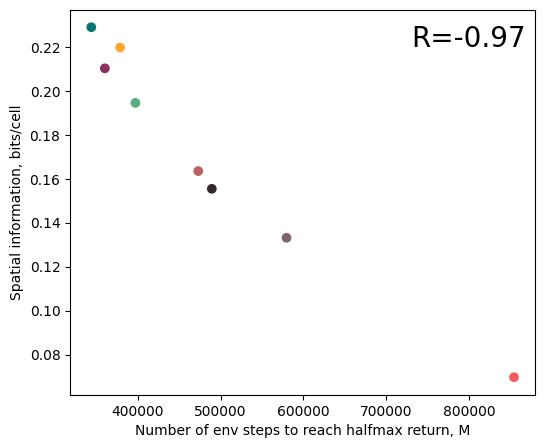

In [173]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(halfspeed, info, color=[CLRS['salmon'],CLRS['coal'],CLRS['magenta'],CLRS['cyan'],CLRS['orange'],CLRS['mint'],CLRS['coral'],CLRS['grey']])
# ax.set_facecolor(CLRS['beige'])
plt.ylabel('Spatial information, bits/cell')
plt.xlabel('Number of env steps to reach halfmax return, M')
plt.text(730000, 0.22, 'R=-0.97', fontsize=20)
# plt.xlim(1)
# plt.yticks(np.arange(0,1.1,0.1))
# plt.legend(('SD=1', 'SD=2', 'SD=3', 'SD=4', 'SD=5', 'SD=6'), loc=4)
plt.show()
fig.savefig('storage/figs/SI_speed.png', transparent=True)

In [46]:
data_024, frames_024 = collect_data("storage/PC negative comparison/024")
data_027, frames_027 = collect_data("storage/PC negative comparison/027")
data_030, frames_030 = collect_data("storage/PC negative comparison/03")
data_035, frames_035 = collect_data("storage/PC negative comparison/035")
data_040, frames_040 = collect_data("storage/PC negative comparison/04")

In [47]:
mean_024 = data_024.mean(axis=0)
mean_027 = data_027.mean(axis=0)
mean_030 = data_030.mean(axis=0)
mean_035 = data_035.mean(axis=0)
mean_040 = data_040.mean(axis=0)

std_024 = data_024.std(axis=0)
std_027 = data_027.std(axis=0)
std_030 = data_030.std(axis=0)
std_035 = data_035.std(axis=0)
std_040 = data_040.std(axis=0)

In [48]:
mean_024 = smooth(mean_024)[:-20]
mean_027 = smooth(mean_027)[:-20]
mean_030 = smooth(mean_030)[:-20]
mean_035 = smooth(mean_035)[:-20]
mean_040 = smooth(mean_040)[:-20]

std_024 = smooth(std_024)[:-20]
std_027 = smooth(std_027)[:-20]
std_030 = smooth(std_030)[:-20]
std_035 = smooth(std_035)[:-20]
std_040 = smooth(std_040)[:-20]

In [49]:
frames_024 = frames_024[:-20]
frames_027 = frames_027[:-20]
frames_030 = frames_030[:-20]
frames_035 = frames_035[:-20]
frames_040 = frames_040[:-20]

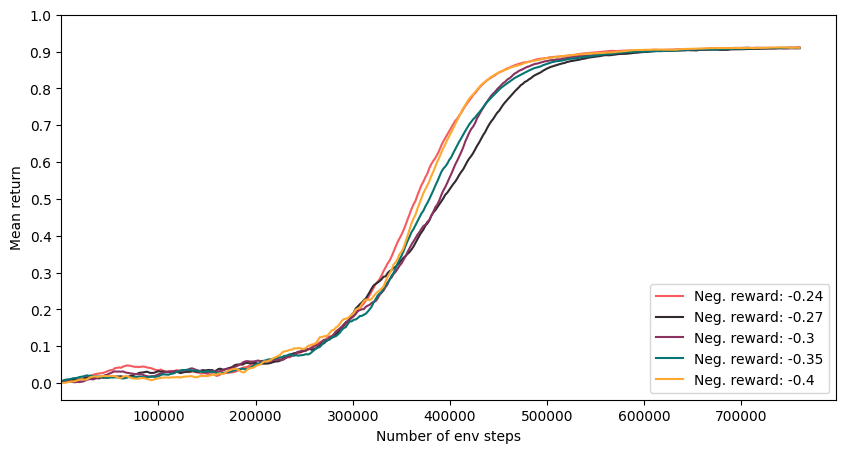

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(frames_024, mean_024, color=CLRS['salmon'])
ax.plot(frames_027, mean_027, color=CLRS['coal'])
ax.plot(frames_030, mean_030, color=CLRS['magenta'])
ax.plot(frames_035, mean_035, color=CLRS['cyan'])
ax.plot(frames_040, mean_040, color=CLRS['orange'])
# ax.fill_between(frames_024, mean_024-std_024, mean_024+std_024, color=CLRS['salmon'], alpha=0.3)
# ax.fill_between(frames_027, mean_027-std_027, mean_027+std_027, color=CLRS['coal'], alpha=0.3)
# # ax.fill_between(frames_030, mean_030-std_030, mean_030+std_030, color=CLRS['magenta'], alpha=0.3)
# ax.fill_between(frames_035, mean_035-std_035, mean_035+std_035, color=CLRS['cyan'], alpha=0.3)
# ax.fill_between(frames_040, mean_040-std_040, mean_040+std_040, color=CLRS['orange'], alpha=0.3)
plt.ylabel('Mean return')
plt.xlabel('Number of env steps')
plt.xlim(1)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(('Neg. reward: -0.24', 'Neg. reward: -0.27', 'Neg. reward: -0.3', 'Neg. reward: -0.35', 'Neg. reward: -0.4'), loc=4)
plt.show()
fig.savefig('storage/figs/PC_neg_comparison.png', transparent=True)

In [51]:
data_PO_020, frames_PO_020 = collect_data("storage/PO negative comparison/PO-neg020")
data_PO_023, frames_PO_023 = collect_data("storage/PO negative comparison/PO-neg023")
data_PO_024, frames_PO_024 = collect_data("storage/PO negative comparison/PO-neg024")
data_PO_026, frames_PO_026 = collect_data("storage/PO negative comparison/PO-neg026")
data_PO_027, frames_PO_027 = collect_data("storage/PO negative comparison/PO-neg027")
data_PO_030, frames_PO_030 = collect_data("storage/PO negative comparison/PO-neg030")

In [52]:
mean_PO_020 = smooth(data_PO_020.mean(axis=0))[:-20]
mean_PO_023 = smooth(data_PO_023.mean(axis=0))[:-20]
mean_PO_024 = smooth(data_PO_024.mean(axis=0))[:-20]
mean_PO_026 = smooth(data_PO_026.mean(axis=0))[:-20]
mean_PO_027 = smooth(data_PO_027.mean(axis=0))[:-20]
mean_PO_030 = smooth(data_PO_030.mean(axis=0))[:-20]

std_PO_020 = smooth(data_PO_020.std(axis=0))[:-20]
std_PO_023 = smooth(data_PO_023.std(axis=0))[:-20]
std_PO_024 = smooth(data_PO_024.std(axis=0))[:-20]
std_PO_026 = smooth(data_PO_026.std(axis=0))[:-20]
std_PO_027 = smooth(data_PO_027.std(axis=0))[:-20]
std_PO_030 = smooth(data_PO_030.std(axis=0))[:-20]

frames_PO_020 = frames_PO_020[:-20]
frames_PO_023 = frames_PO_023[:-20]
frames_PO_024 = frames_PO_024[:-20]
frames_PO_026 = frames_PO_026[:-20]
frames_PO_027 = frames_PO_027[:-20]
frames_PO_030 = frames_PO_030[:-20]

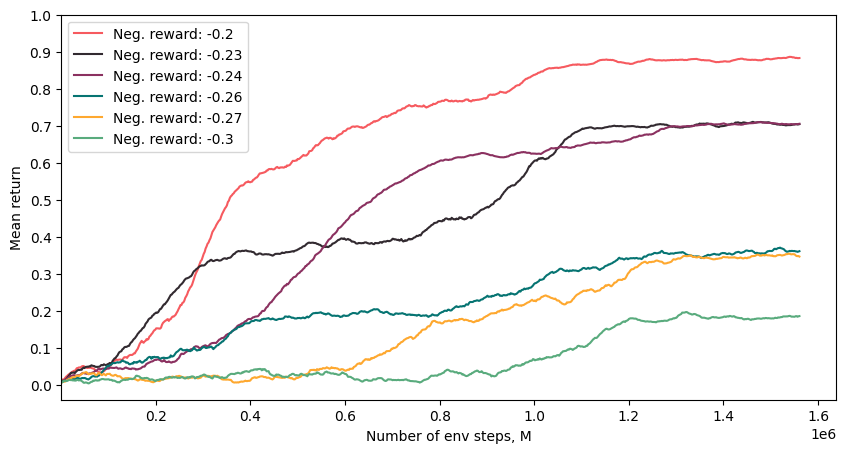

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(frames_PO_020, mean_PO_020, color=CLRS['salmon'])
ax.plot(frames_PO_023, mean_PO_023, color=CLRS['coal'])
ax.plot(frames_PO_024, mean_PO_024, color=CLRS['magenta'])
ax.plot(frames_PO_026, mean_PO_026, color=CLRS['cyan'])
ax.plot(frames_PO_027, mean_PO_027, color=CLRS['orange'])
ax.plot(frames_PO_030, mean_PO_030, color=CLRS['mint'])
# ax.fill_between(frames_024, mean_024-std_024, mean_024+std_024, color=CLRS['salmon'], alpha=0.3)
# ax.fill_between(frames_027, mean_027-std_027, mean_027+std_027, color=CLRS['coal'], alpha=0.3)
# # ax.fill_between(frames_030, mean_030-std_030, mean_030+std_030, color=CLRS['magenta'], alpha=0.3)
# ax.fill_between(frames_035, mean_035-std_035, mean_035+std_035, color=CLRS['cyan'], alpha=0.3)
# ax.fill_between(frames_040, mean_040-std_040, mean_040+std_040, color=CLRS['orange'], alpha=0.3)
plt.ylabel('Mean return')
plt.xlabel('Number of env steps, M')
plt.xlim(1)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(('Neg. reward: -0.2', 'Neg. reward: -0.23', 'Neg. reward: -0.24', 'Neg. reward: -0.26', 'Neg. reward: -0.27', 'Neg. reward: -0.3'), loc=2)
plt.show()
fig.savefig('storage/figs/PO_neg_comparison.png', transparent=True)

In [20]:
FO_neg_mean, _, _, _, FO_neg_frames = smooth_data('storage/neg_reward/FO')
PO_neg_mean, _, _, _, PO_neg_frames = smooth_data('storage/neg_reward/PO')

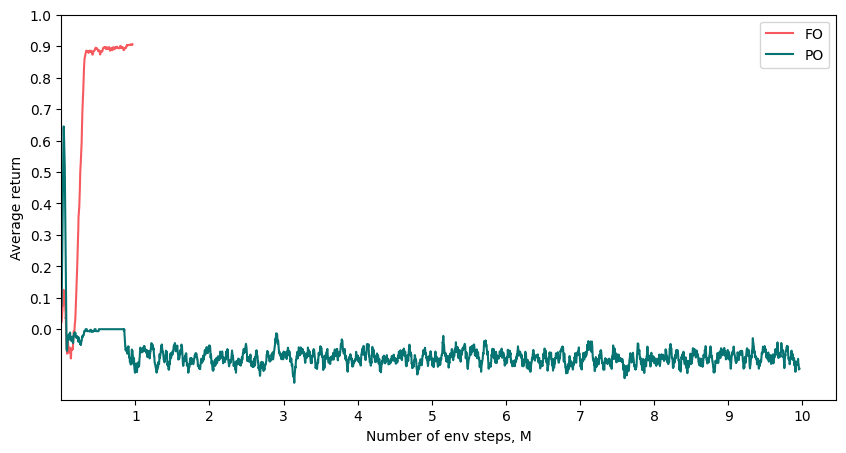

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(FO_neg_frames, FO_neg_mean, color=CLRS['salmon'])
ax.plot(PO_neg_frames, PO_neg_mean, color=CLRS['cyan'])
plt.ylabel('Average return')
plt.xlabel('Number of env steps, M')
plt.xlim(1)
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(1e6, 11e6, 1e6), np.arange(1,11,1))
plt.legend(('FO', 'PO'), loc=1)
plt.show()
# fig.savefig('storage/figs/negative.png', transparent=True)

In [137]:
def make_grid(sd):
    fake_pc = utils.FakePlaceCells(env, 300, sd)
    grid = np.zeros((300, 23*17))
    for i in range(23):
        for j in range(17):
            response = fake_pc.activation((i+1,j+1))
            grid[:,i*17+j] = response
    return grid

In [92]:
pos = np.vstack((np.indices((23,17))[0].flatten(),np.indices((23,17))[1].flatten())).T

In [149]:
import pynapple as nap

def create_tds(cell, sd, pos):
    grid = make_grid(sd)
    position = nap.TsdFrame(t = np.arange(23*17),
                            d = pos,
                            columns = ('x','y'), time_units = 'ms')
    rates = nap.TsdFrame(t = np.arange(23*17),
                         d = grid.T, time_units = 'ms')
    place_fields,xy = nap.compute_2d_tuning_curves_continuous(rates,position,
                                                              nb_bins=16,
                                                              )
    return place_fields

In [150]:
pf1 = create_tds(0,1,pos)
pf2 = create_tds(0,2,pos)
pf3 = create_tds(0,3,pos)
pf4 = create_tds(0,4,pos)
pf5 = create_tds(0,5,pos)
pf6 = create_tds(0,6,pos)
pf7 = create_tds(0,7,pos)
pf8 = create_tds(0,8,pos)

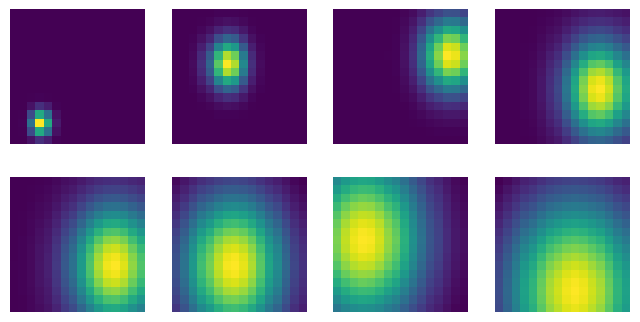

In [154]:
fig = plt.figure(figsize=(8,4))
axs = fig.subplots(2,4)
axs[0,0].imshow(pf1[0].transpose(), interpolation='nearest')
axs[0,0].axis('off')
axs[0,1].imshow(pf2[1].transpose(), interpolation='nearest')
axs[0,1].axis('off')
axs[0,2].imshow(pf3[2].transpose(), interpolation='nearest')
axs[0,2].axis('off')
axs[0,3].imshow(pf4[3].transpose(), interpolation='nearest')
axs[0,3].axis('off')
axs[1,0].imshow(pf5[12].transpose(), interpolation='nearest')
axs[1,0].axis('off')
axs[1,1].imshow(pf6[9].transpose(), interpolation='nearest')
axs[1,1].axis('off')
axs[1,2].imshow(pf7[14].transpose(), interpolation='nearest')
axs[1,2].axis('off')
axs[1,3].imshow(pf8[11].transpose(), interpolation='nearest')
axs[1,3].axis('off')
plt.show()
fig.savefig('storage/figs/place_fields.png', transparent=True)